<a href="https://colab.research.google.com/github/LeeJaeEun0/st1221/blob/main/221221_%EB%B3%B4%ED%97%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DecisionTreeRegressor 회귀 문제를 해결
## 보험
### 데이터 -> 모델링 -> 분류/회귀 => 기존의 모델들과 정확도 비교
### plot_tree로 시각화

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# https://raw.githubusercontent.com/bigdata-young/ai_26th/main/data/insurance.csv
df = pd.read_csv('https://raw.githubusercontent.com/bigdata-young/ai_26th/main/data/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9000,0,yes,southwest,16884.9200
1,18,male,33.8000,1,no,southeast,1725.5500
2,28,male,33.0000,3,no,southeast,4449.4600
3,33,male,22.7000,0,no,northwest,21984.4700
4,32,male,28.9000,0,no,northwest,3866.8600
...,...,...,...,...,...,...,...
1333,50,male,31.0000,3,no,northwest,10600.5500
1334,18,female,31.9000,0,no,northeast,2205.9800
1335,18,female,36.9000,0,no,southeast,1629.8300
1336,21,female,25.8000,0,no,southwest,2007.9500


In [ ]:
df.info() # 결측치 없음, object - 3개 # sex, smoker - 이진분류로 가능, region을 어떻게 처리하지?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
pd.options.display.float_format = '{:.4f}'.format
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.0000,1338,1338.0000,1338.0000,1338,1338,1338.0000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.2070,NaN,30.6655,1.0949,NaN,NaN,13270.4224
std,14.0500,NaN,6.0984,1.2055,NaN,NaN,12110.0112
min,18.0000,NaN,16.0000,0.0000,NaN,NaN,1121.8700
25%,27.0000,NaN,26.3000,0.0000,NaN,NaN,4740.2875
50%,39.0000,NaN,30.4000,1.0000,NaN,NaN,9382.0300
75%,51.0000,NaN,34.7000,2.0000,NaN,NaN,16639.9150


## 전처리

## 1. 성별

In [ ]:
df.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df.smoker.eq('yes').mul(1) # (df.smoker == 'yes') * 1

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:
df.smoker = df.smoker.eq('yes').mul(1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 73.3+ KB


## 2. 성별, 지역

In [ ]:
df2 = df.copy()
df = pd.get_dummies(df, columns=['sex','region'], drop_first=True)
df

,age,bmi,children,smoker,expenses,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.9000,0,1,16884.9200,0,0,0,1
1,18,33.8000,1,0,1725.5500,1,0,1,0
2,28,33.0000,3,0,4449.4600,1,0,1,0
3,33,22.7000,0,0,21984.4700,1,1,0,0
4,32,28.9000,0,0,3866.8600,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,31.0000,3,0,10600.5500,1,1,0,0
1334,18,31.9000,0,0,2205.9800,0,0,0,0
1335,18,36.9000,0,0,1629.8300,0,0,1,0
1336,21,25.8000,0,0,2007.9500,0,0,0,1


In [ ]:
df.columns

Index(['age', 'bmi', 'children', 'smoker', 'expenses', 'sex_male',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

## 훈련셋, 시험셋

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('expenses', axis=1)
y = df['expenses']

X_train, X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2, random_state=16
    )

## 모델링 & 평가

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(random_state=21)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=21)

In [ ]:
pred = model.predict(X_test)
pred

array([12105.32,  4529.48, 21348.71, 47305.31, 10807.49, 40904.2 ,
       22218.11,  7325.05, 48517.56,  8334.59,  8068.19,  4795.66,
        6082.41,  7147.11,  6203.9 , 10214.64,  4529.48, 13555.  ,
       10977.21,  5246.05,  2566.47,  5920.1 , 19798.05, 36950.26,
        3597.6 ,  2304.  ,  6770.19,  5757.41,  7443.64,  4347.02,
        3309.79,  6272.48, 19444.27, 11512.41,  7348.14, 43254.42,
        4529.48,  3947.41,  7196.87,  1532.47, 10923.93, 10942.13,
       11436.74,  8062.76,  1744.47,  5920.1 ,  2219.45,  9301.89,
        4931.65,  5920.1 ,  6664.69, 11856.41, 10214.64,  8782.47,
        4846.92, 20420.6 ,  1744.47, 13393.76,  5373.36, 13041.92,
        2156.75,  5031.27, 30166.62,  3490.55,  9704.67, 20709.02,
       17128.43,  5373.36, 11840.78,  1727.79,  4529.48,  1719.44,
        9264.8 , 24180.93, 16796.41,  5989.52, 37607.53, 38126.25,
       12646.21,  6238.3 ,  4795.66,  1877.93,  3208.79, 12523.6 ,
       13126.68,  1880.49,  1880.49,  2219.45,  2007.95,  6113

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
#accuracy_score(X_test, pred)
# Classification metrics can't handle a mix of continuous-multioutput and continuous targets 오류 발생

## 트리 시각화

In [ ]:
from sklearn.tree import plot_tree

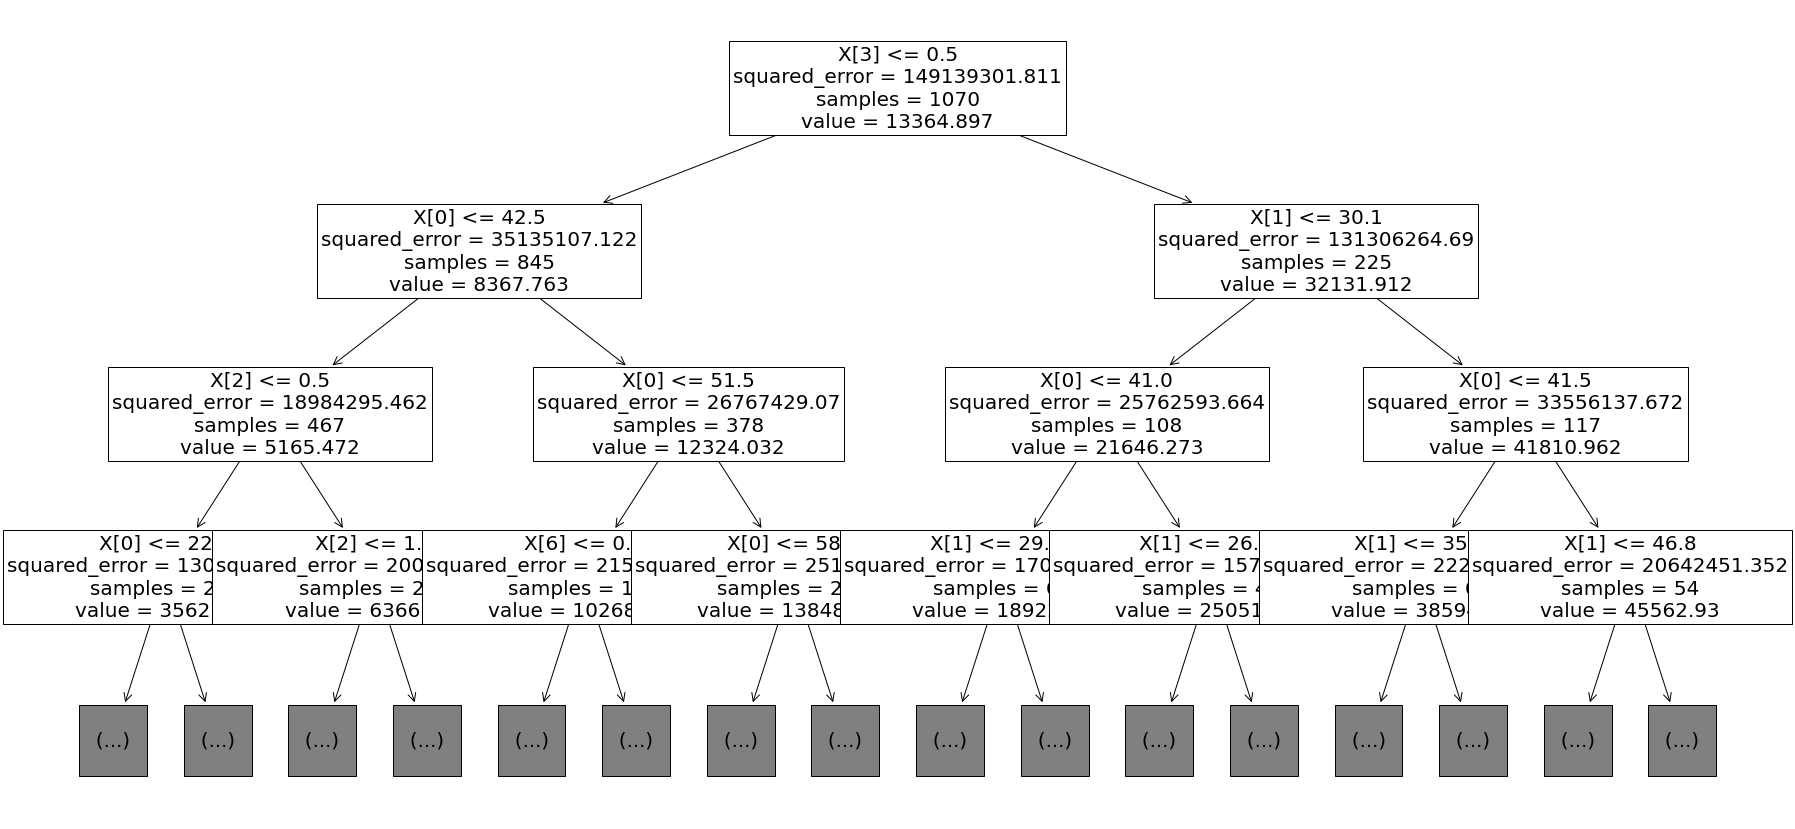

In [ ]:
plt.figure(figsize=(30, 15)) # plt 객체의 크기 결정
# 트리 구조를 보고 싶은 모델을 넣고, 최대 깊이, 폰트 사이즈, 
plot_tree(model, max_depth=3, fontsize=20) # 변수명 지정 X
plt.show()